In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Web Scraping Latest COVID-19 News
def scrape_covid_news():
    url = 'https://www.bbc.com/news/coronavirus'
    response = requests.get(url, verify=False)

    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract headlines (adjust selector if needed)
    headlines = soup.select('h3')  # Might need refining!
    news = [headline.get_text(strip=True) for headline in headlines if headline.get_text(strip=True)]
    
    return news

covid_news = scrape_covid_news()
print("\nLatest COVID-19 News Headlines:")
for news in covid_news[:10]:  # Limit to top 10 for clarity
    print("-", news)

# Step 2: Scrape Country-specific COVID-19 Data from Wikipedia
def scrape_country_data():
    url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all wikitable elements
    tables = soup.find_all('table', {'class': 'wikitable'})

    if tables:
        print(f"Found {len(tables)} tables. Using the first one by default.\n")
        
        # Let's try the first table (can adjust index if needed)
        table = tables[0]
        
        # Read the table into DataFrame
        df_wiki = pd.read_html(str(table))[0]
        
        # Check if columns are MultiIndex before dropping level
        if isinstance(df_wiki.columns, pd.MultiIndex):
            df_wiki.columns = df_wiki.columns.droplevel()
        
        # Optional: Clean up rows/columns
        df_wiki = df_wiki.dropna(how='all')  # Drop rows where all columns are NaN
        
        return df_wiki
    else:
        print("No wikitable found on the page.")
        return pd.DataFrame()

df_country = scrape_country_data()

if not df_country.empty:
    print("\nScraped COVID-19 Data (first 5 rows):")
    print(df_country.head())
else:
    print("\nNo data to display.")


c:\Users\shally.ujjwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bbc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Latest COVID-19 News Headlines:
Found 5 tables. Using the first one by default.


Scraped COVID-19 Data (first 5 rows):
                          0          1
0  Total samples tested[87]  682428595
1      Total positive cases   33678786
2        New samples tested    1154302
3        New Positive cases      26248
4       New Positivity Rate       2.5%


C:\Users\shally.ujjwal\AppData\Local\Temp\ipykernel_22176\1999447559.py:39: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_wiki = pd.read_html(str(table))[0]


Data Loading, Cleaning & Transformation

In [3]:
# Load the global COVID-19 dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Select key columns of interest
cols = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
        'new_deaths', 'total_vaccinations', 'people_vaccinated',
        'population', 'continent']
df = df[cols]

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Remove rows with missing continent data (to focus on countries)
df = df.dropna(subset=['continent'])

# Fill missing total_vaccinations with 0 (if necessary)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)

# Add a vaccination rate feature (% of population vaccinated)
df['vaccination_rate'] = (df['total_vaccinations'] / df['population']) * 100

# Display the cleaned data
print(df.head())


      location       date  total_cases  new_cases  total_deaths  new_deaths  \
0  Afghanistan 2020-01-05          0.0        0.0           0.0         0.0   
1  Afghanistan 2020-01-06          0.0        0.0           0.0         0.0   
2  Afghanistan 2020-01-07          0.0        0.0           0.0         0.0   
3  Afghanistan 2020-01-08          0.0        0.0           0.0         0.0   
4  Afghanistan 2020-01-09          0.0        0.0           0.0         0.0   

   total_vaccinations  people_vaccinated  population continent  \
0                 0.0                NaN    41128772      Asia   
1                 0.0                NaN    41128772      Asia   
2                 0.0                NaN    41128772      Asia   
3                 0.0                NaN    41128772      Asia   
4                 0.0                NaN    41128772      Asia   

   vaccination_rate  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.

EDA

In [5]:
# Summary Statistics
print(df.describe())

# Distribution of total cases and deaths across countries
print(df.groupby('location')[['total_cases', 'total_deaths']].max().sort_values(by='total_cases', ascending=False).head(10))

# Missing values
print(df.isnull().sum())

                                date   total_cases     new_cases  \
count                         402910  3.917160e+05  3.900710e+05   
mean   2022-04-18 09:33:33.108634368  1.827082e+06  1.989215e+03   
min              2020-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-02-28 00:00:00  5.516000e+03  0.000000e+00   
50%              2022-04-17 00:00:00  5.093700e+04  0.000000e+00   
75%              2023-06-07 00:00:00  5.610120e+05  0.000000e+00   
max              2024-08-14 00:00:00  1.034368e+08  4.047548e+07   
std                              NaN  7.857184e+06  8.585827e+04   

       total_deaths     new_deaths  total_vaccinations  people_vaccinated  \
count  3.917160e+05  390520.000000        4.029100e+05       6.586500e+04   
mean   2.044839e+04      18.080989        1.621726e+07       3.439692e+07   
min    0.000000e+00       0.000000        0.000000e+00       0.000000e+00   
25%    3.700000e+01       0.000000        0.000000e+00       7.402890e+05   
50

Visualizations with Matplotlib & Seaborn

A️⃣ Trend Plot for a Country (India)

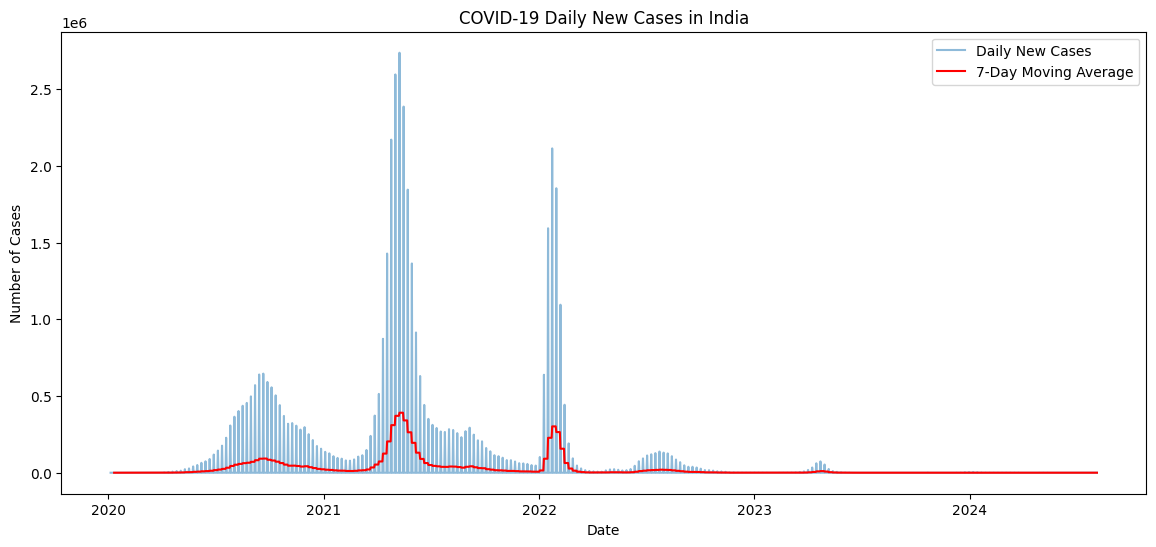

In [10]:


# Filter data for a specific country (India)
country = 'India'
data_country = df[df['location'] == country]

# Plot new cases over time
plt.figure(figsize=(14, 6))
plt.plot(data_country['date'], data_country['new_cases'], label='Daily New Cases', alpha=0.5)
plt.plot(data_country['date'], data_country['new_cases'].rolling(window=7).mean(), label='7-Day Moving Average', color='red')
plt.title(f'COVID-19 Daily New Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


B️⃣ Vaccination vs Cases (Dual Axis Plot)

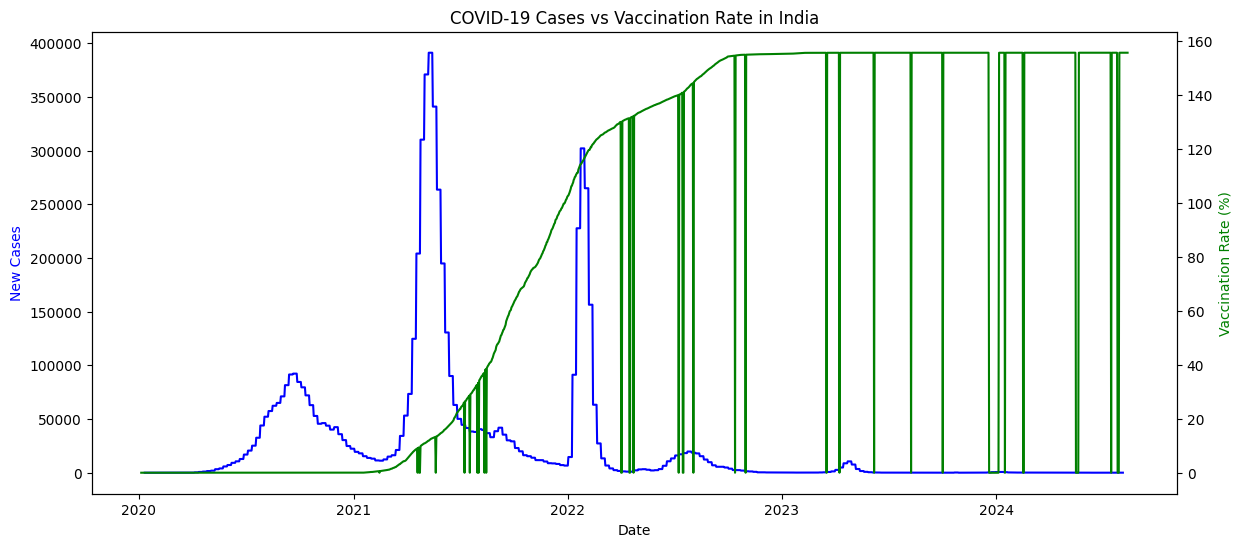

In [11]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Plot 7-day moving average for new cases
ax1.plot(data_country['date'], data_country['new_cases'].rolling(7).mean(), color='blue', label='7-Day Avg Cases')
ax2.plot(data_country['date'], data_country['vaccination_rate'], color='green', label='Vaccination Rate (%)')

ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='blue')
ax2.set_ylabel('Vaccination Rate (%)', color='green')
plt.title(f'COVID-19 Cases vs Vaccination Rate in {country}')
plt.show()


C️⃣ Bar Chart: Total Cases & Deaths by Continent

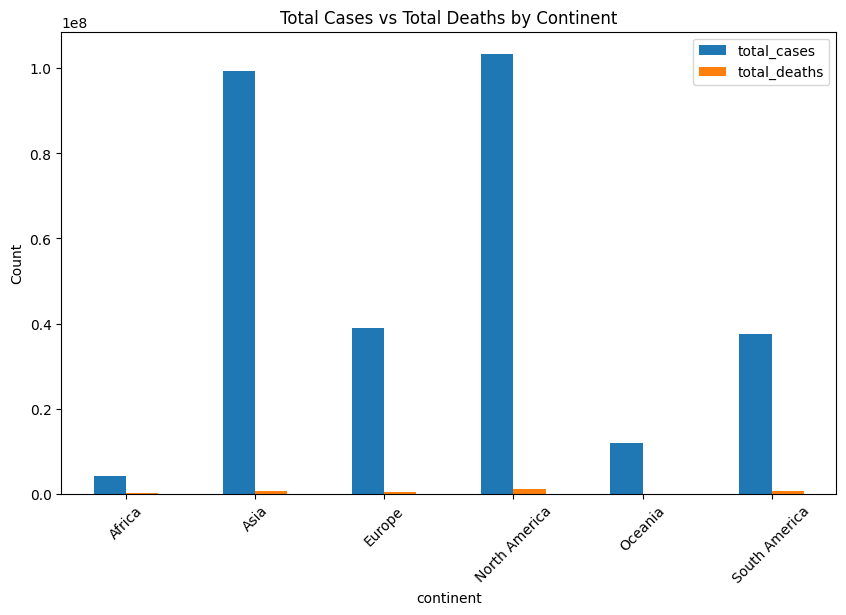

In [12]:
continent_summary = df.groupby('continent')[['total_cases', 'total_deaths']].max()

continent_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Total Cases vs Total Deaths by Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


D️⃣ Heatmap: Correlation of COVID Metrics

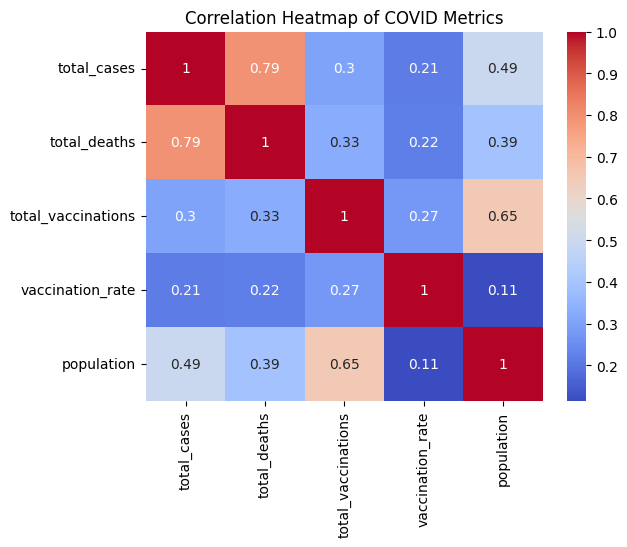

In [13]:


corr = df[['total_cases', 'total_deaths', 'total_vaccinations', 'vaccination_rate', 'population']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID Metrics')
plt.show()


E️⃣ Boxplot: Distribution of Cases by Continent

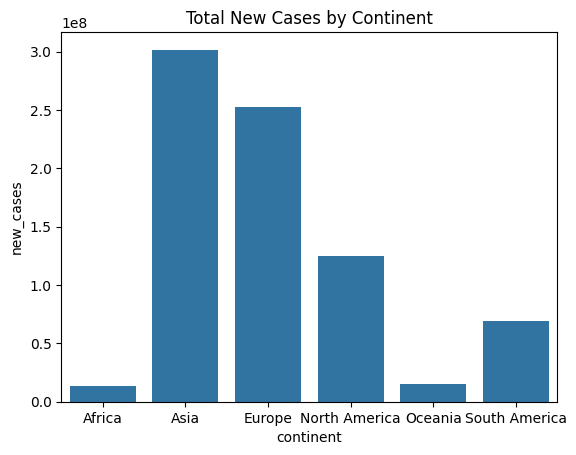

In [18]:
continent_summary = df.groupby('continent')['new_cases'].sum().reset_index()

sns.barplot(data=continent_summary, x='continent', y='new_cases')
plt.title('Total New Cases by Continent')
plt.show()



Identifying Peaks in New Cases

In [19]:
# Ensure 'new_cases' is numeric and drop rows with NaN values
df['new_cases'] = pd.to_numeric(df['new_cases'], errors='coerce')

# Remove rows with NaN in critical columns
df_clean = df.dropna(subset=['location', 'new_cases', 'date'])

# Get the index of rows with maximum 'new_cases' per 'location'
peak_indices = df_clean.groupby('location')['new_cases'].idxmax()

# Ensure we only get valid indices (drop any NaN indices)
peak_indices = peak_indices.dropna()

# Now extract the rows using valid indices
peak_cases = df_clean.loc[peak_indices][['location', 'date', 'new_cases']]

# Sort by 'new_cases' in descending order and display top 10
print(peak_cases.sort_values(by='new_cases', ascending=False).head(10))


              location       date   new_cases
74755            China 2022-12-25  40475477.0
404193   United States 2022-01-16   5650933.0
174039           India 2021-05-09   2738957.0
360043     South Korea 2022-03-20   2716348.0
131116          France 2022-01-23   2417043.0
418987         Vietnam 2022-03-20   1845400.0
141223         Germany 2022-03-27   1588891.0
189571           Japan 2022-08-07   1496968.0
316853          Russia 2022-02-13   1323391.0
402512  United Kingdom 2022-01-09   1320332.0


Project Title:
Global COVID-19 Data Analysis & Visualization with Pandas, Matplotlib & Seaborn

Description:
Collected global COVID-19 data through web scraping and used the Our World in Data dataset for in-depth analysis.

Cleaned and transformed the data using Pandas, handling missing values and creating new features like vaccination rates.

Performed Exploratory Data Analysis (EDA), including calculating summary statistics, identifying trends, and detecting outliers.

Created insightful visualizations with Matplotlib and Seaborn, including time-series plots, bar charts, heatmaps, and boxplots to explore global and country-specific COVID-19 trends.

Skills Highlighted:
Data cleaning & feature engineering with Pandas

Web scraping for real-time data collection

Advanced data visualization using Matplotlib & Seaborn

Exploratory Data Analysis (EDA) and data storytelling

Data-driven decision making & reporting
